In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/A01796607/MLOps_Equipo19/refs/heads/main/data/raw/turkis_music_emotion_original.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [4]:
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [5]:
df.describe()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


In [6]:
porcentaje_faltantes = df.isna().mean() * 100
porcentaje_faltantes

,0
Class,0.0
_RMSenergy_Mean,0.0
_Lowenergy_Mean,0.0
_Fluctuation_Mean,0.0
_Tempo_Mean,0.0
_MFCC_Mean_1,0.0
_MFCC_Mean_2,0.0
_MFCC_Mean_3,0.0
_MFCC_Mean_4,0.0
_MFCC_Mean_5,0.0


Descripción Variables númericas

In [7]:
columnas_numericas = df.select_dtypes(include=[np.number])
describe_df = columnas_numericas.describe()
nom_estadisticas = {
    'mean': 'Media',
    '50%': 'Mediana/Cuartil 50%',
    'min': 'Min',
    'max': 'Max',
    'std': 'Desviacion estandar',
    '25%': 'Cuartil 25%',
    '75%': 'Cuartil 75%'
}

estadisticas = describe_df.rename(index=nom_estadisticas).drop(index='count')
estadisticas

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
Media,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
Desviacion estandar,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
Min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
Cuartil 25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
Mediana/Cuartil 50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
Cuartil 75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
Max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


ValueError: num must be an integer with 1 <= num <= 12, not 13

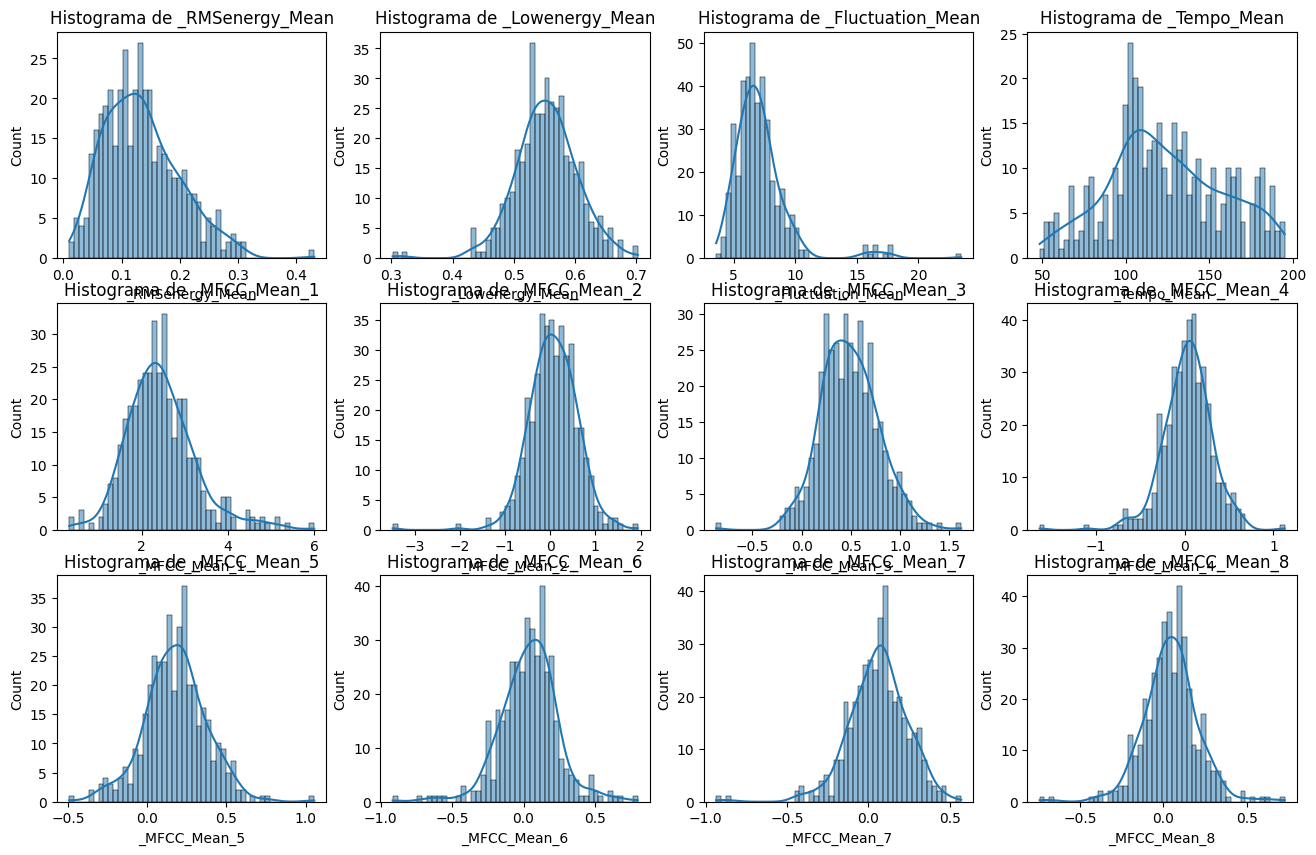

In [9]:
plt.figure(figsize=(16, 10))

for col in columnas_numericas.columns:
    plt.subplot(3, 4, columnas_numericas.columns.get_loc(col) + 1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title('Histograma de {}'.format(col))

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 9

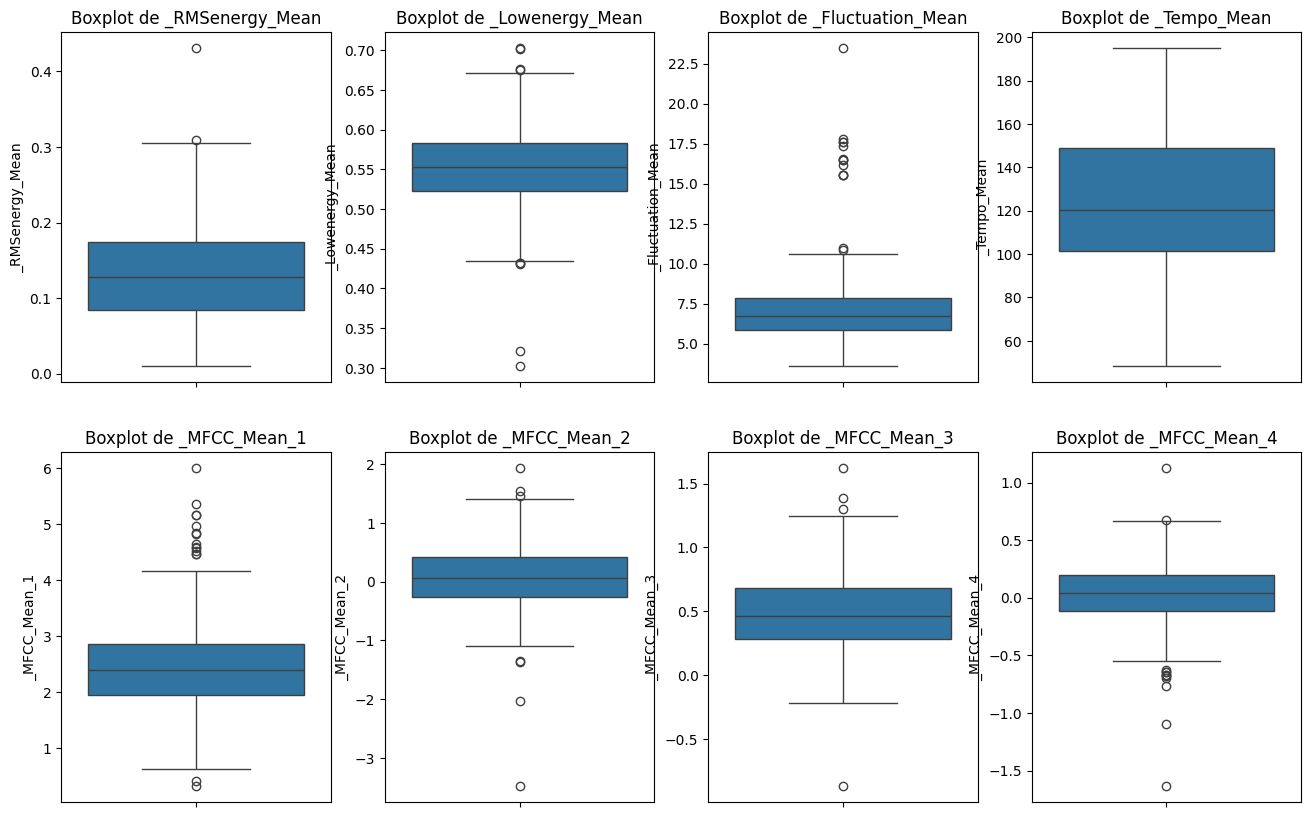

In [10]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()

plt.show()

Variables de texto

In [11]:
num_no_numericos_columnas = df.select_dtypes(exclude=[np.number])
estadisticas_default = num_no_numericos_columnas.describe(include = 'object')

nom_estadisticas = {
    'top': 'Moda',
    'unique': 'Cardinalidad'
}

estadisticas = estadisticas_default.rename(index=nom_estadisticas).drop(index=['count','freq'])
estadisticas

,Class
Cardinalidad,4
Moda,relax


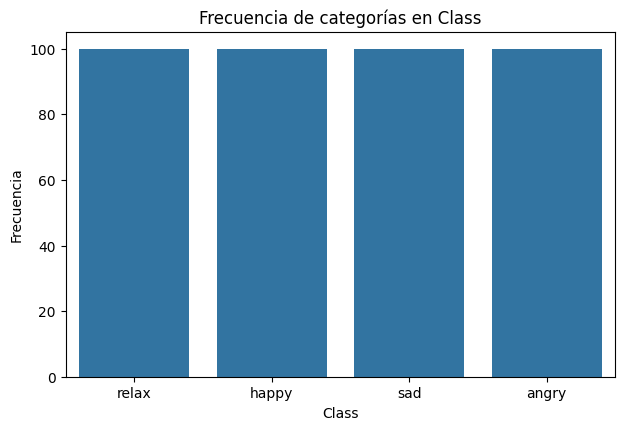

In [12]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_no_numericos_columnas):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df)
    plt.title('Frecuencia de categorías en {}'.format(col))
    plt.ylabel('Frecuencia')
    plt.xlabel(col)

plt.tight_layout()

plt.show()

                   _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  \
_RMSenergy_Mean           1.000000        -0.281123          -0.170943   
_Lowenergy_Mean          -0.281123         1.000000           0.051927   
_Fluctuation_Mean        -0.170943         0.051927           1.000000   
_Tempo_Mean               0.001018        -0.041363          -0.119922   
_MFCC_Mean_1             -0.196514         0.123084           0.077035   

                   _Tempo_Mean  _MFCC_Mean_1  
_RMSenergy_Mean       0.001018     -0.196514  
_Lowenergy_Mean      -0.041363      0.123084  
_Fluctuation_Mean    -0.119922      0.077035  
_Tempo_Mean           1.000000     -0.065000  
_MFCC_Mean_1         -0.065000      1.000000  


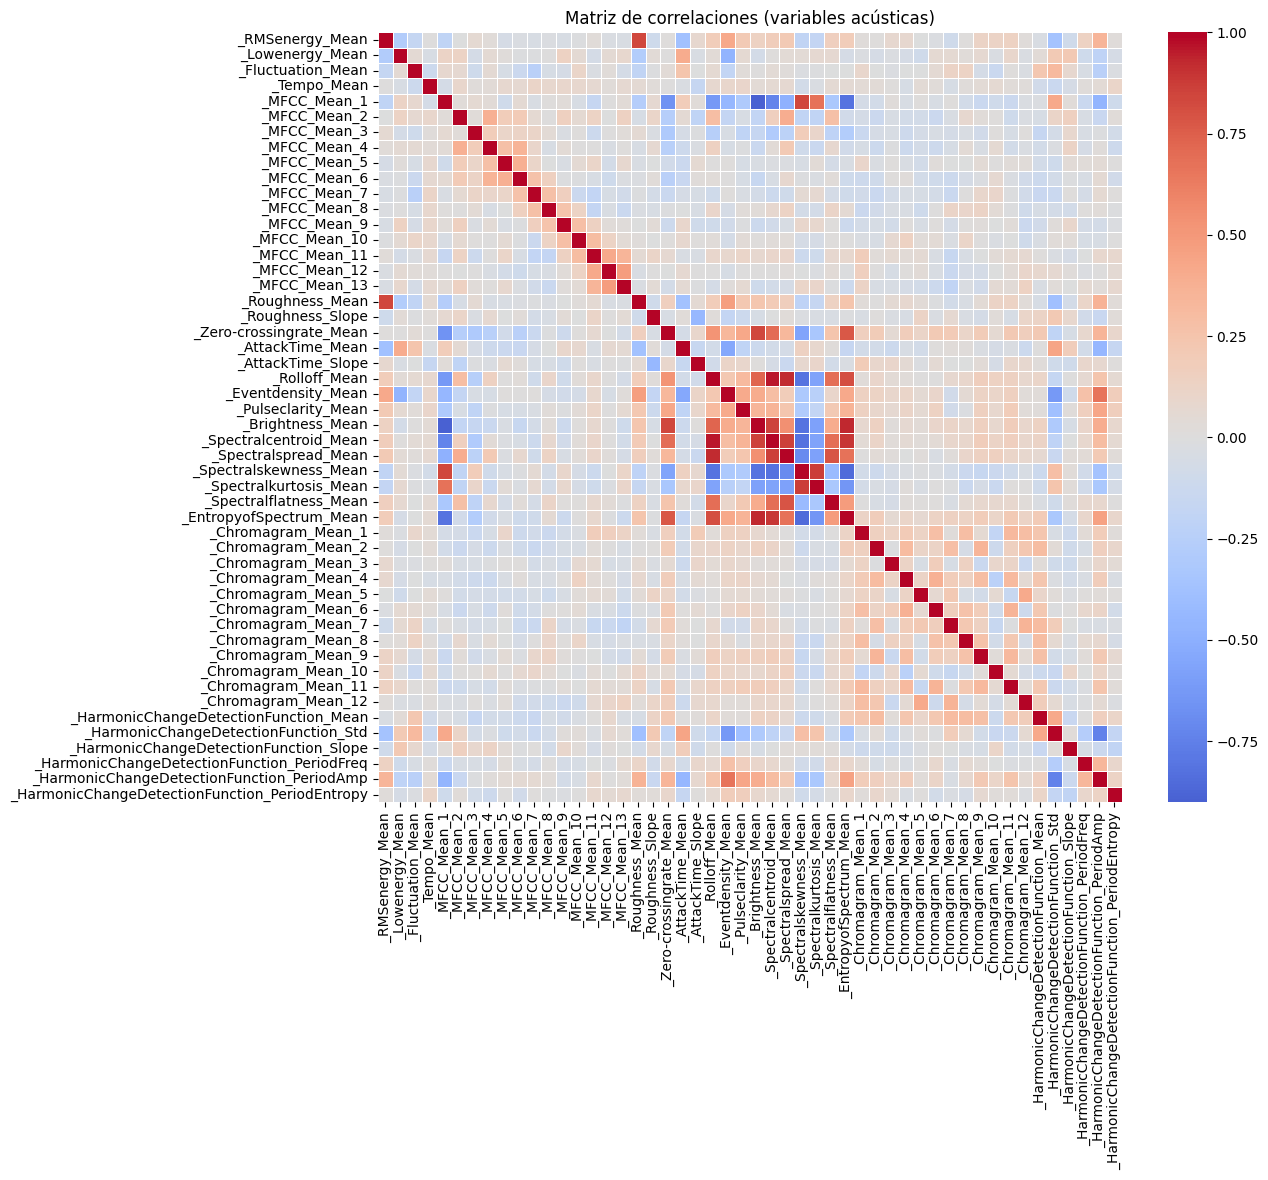

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

corr_matrix = df_numeric.corr()

# Mostrar parte de la matriz
print(corr_matrix.iloc[:5, :5])

# Visualización
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlaciones (variables acústicas)")
plt.show()

In [14]:
df_limpio = df.copy()

for col in numeric_cols:
    Q1 = df_limpio[col].quantile(0.25)
    Q3 = df_limpio[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar
    df_limpio = df_limpio[(df_limpio[col] >= limite_inferior) & (df_limpio[col] <= limite_superior)]

    print(f"{col}: Filas restantes {df_limpio.shape[0]}")


_RMSenergy_Mean: Filas restantes 398
_Lowenergy_Mean: Filas restantes 390
_Fluctuation_Mean: Filas restantes 377
_Tempo_Mean: Filas restantes 377
_MFCC_Mean_1: Filas restantes 364
_MFCC_Mean_2: Filas restantes 356
_MFCC_Mean_3: Filas restantes 353
_MFCC_Mean_4: Filas restantes 345
_MFCC_Mean_5: Filas restantes 341
_MFCC_Mean_6: Filas restantes 326
_MFCC_Mean_7: Filas restantes 319
_MFCC_Mean_8: Filas restantes 310
_MFCC_Mean_9: Filas restantes 305
_MFCC_Mean_10: Filas restantes 301
_MFCC_Mean_11: Filas restantes 292
_MFCC_Mean_12: Filas restantes 288
_MFCC_Mean_13: Filas restantes 278
_Roughness_Mean: Filas restantes 265
_Roughness_Slope: Filas restantes 259
_Zero-crossingrate_Mean: Filas restantes 254
_AttackTime_Mean: Filas restantes 238
_AttackTime_Slope: Filas restantes 237
_Rolloff_Mean: Filas restantes 237
_Eventdensity_Mean: Filas restantes 234
_Pulseclarity_Mean: Filas restantes 228
_Brightness_Mean: Filas restantes 228
_Spectralcentroid_Mean: Filas restantes 227
_Spectralsprea

ValueError: num must be an integer with 1 <= num <= 8, not 9

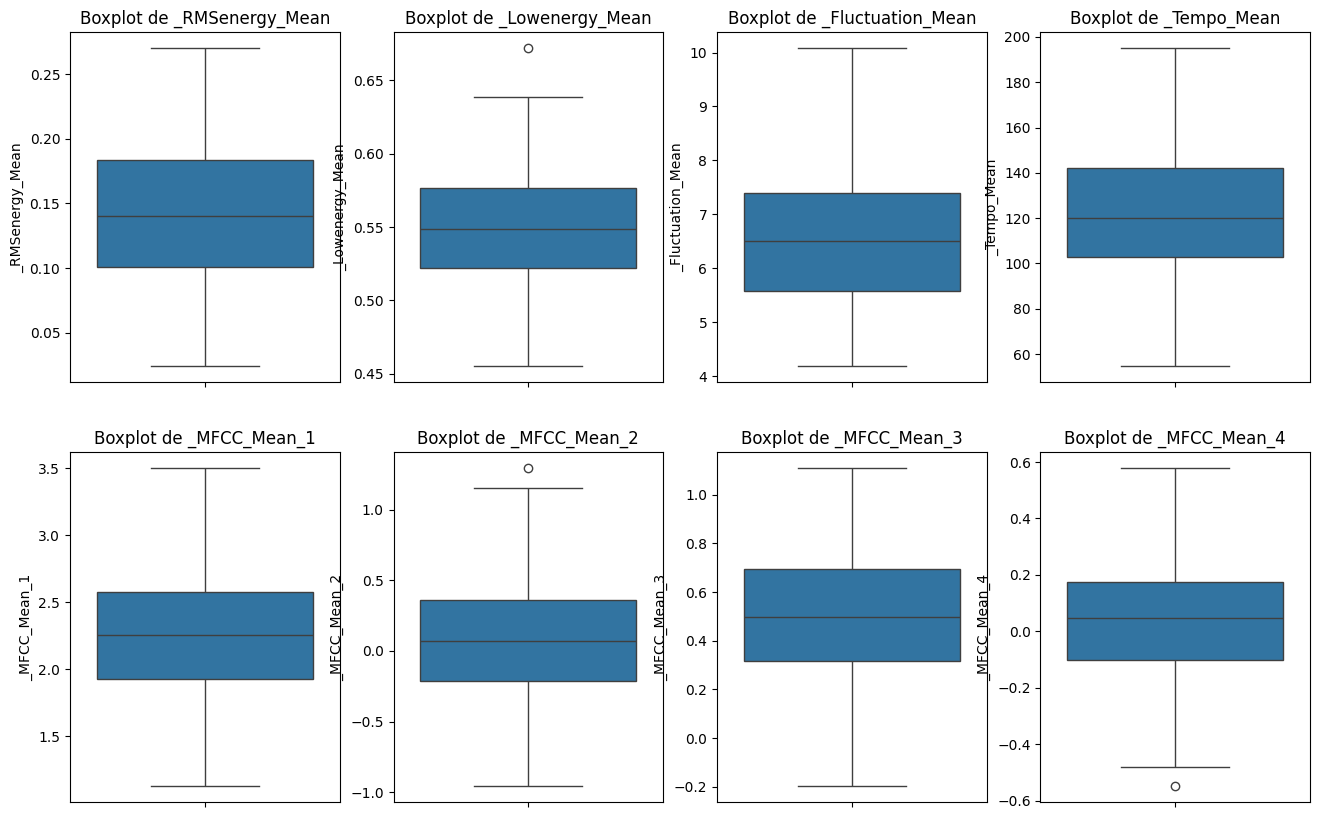

In [15]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df_limpio[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()

plt.show()

Transformaciones

In [16]:
target_col = "Class"

X = df_limpio.drop(columns=[target_col])
y = df_limpio[target_col]

#Categoricas
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Clases originales:", list(le.classes_))
print("Primeros y codificados:", y.head(5).tolist(), "->", y_encoded[:5])


X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Numericas
scaler = StandardScaler(with_mean=True, with_std=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled[:3], X_test_scaled[:3]

#Reduccion de dimencionalidad PCA
usar_pca = True
n_components = 50


pca = PCA(n_components=n_components, random_state=42)
X_train_final = pca.fit_transform(X_train_scaled)
X_test_final  = pca.transform(X_test_scaled)
print("Varianza explicada por componente:", pca.explained_variance_ratio_)
print("Varianza acumulada:", pca.explained_variance_ratio_.sum())
X_train_final = X_train_scaled
X_test_final  = X_test_scaled





Clases originales: ['angry', 'happy', 'relax', 'sad']
Primeros y codificados: ['relax', 'relax', 'relax', 'relax', 'relax'] -> [2 2 2 2 2]
Varianza explicada por componente: [1.57080117e-01 8.97106575e-02 7.77808212e-02 6.67290051e-02
 5.33990332e-02 4.70116076e-02 4.09517393e-02 3.79319526e-02
 3.35048197e-02 3.19393733e-02 2.76376632e-02 2.50577301e-02
 2.38930642e-02 2.19180449e-02 2.03252301e-02 1.96004030e-02
 1.83641341e-02 1.63314992e-02 1.59544257e-02 1.52695980e-02
 1.46111095e-02 1.35918514e-02 1.24501023e-02 1.13110108e-02
 1.03291077e-02 9.57444196e-03 9.32589664e-03 8.97027760e-03
 8.53900024e-03 7.60802885e-03 7.10153623e-03 6.67198947e-03
 5.24911873e-03 5.03962401e-03 4.39307129e-03 4.17846570e-03
 3.89544212e-03 3.32978638e-03 2.83015909e-03 2.43209831e-03
 2.32198547e-03 1.92075503e-03 1.13811434e-03 8.26947254e-04
 7.26654774e-04 5.43159619e-04 4.43080261e-04 1.64767424e-04
 5.98385250e-05 3.16604952e-05]
Varianza acumulada: 1.0


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_predRFC = clf.predict(X_test)

print(classification_report(y_test, y_predRFC, target_names=le.classes_))

              precision    recall  f1-score   support

       angry       0.91      0.91      0.91        11
       happy       0.89      1.00      0.94         8
       relax       0.71      0.83      0.77         6
         sad       0.75      0.50      0.60         6

    accuracy                           0.84        31
   macro avg       0.82      0.81      0.80        31
weighted avg       0.84      0.84      0.83        31



In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import joblib


params = {
    'objective': 'multiclass',
    'num_class': len(le.classes_),
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data)

model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=500,
    callbacks=[lgb.early_stopping(stopping_rounds=5)]

)

y_predGBM = model.predict(X_test_scaled)
y_pred_classesGBM = y_predGBM.argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classesGBM, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classesGBM))

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	training's multi_logloss: 0.295916	valid_1's multi_logloss: 0.597004

Classification Report:
              precision    recall  f1-score   support

       angry       0.91      0.91      0.91        11
       happy       0.89      1.00      0.94         8
       relax       0.75      0.50      0.60         6
         sad       0.57      0.67      0.62         6

    accuracy                           0.81        31
   macro avg       0.78      0.77      0.77        31
weighted avg       0.81      0.81      0.80        31


Confusion Matrix:
[[10  0  0  1]
 [ 0  8  0  0]
 [ 0  1  3  2]
 [ 1  0  1  4]]


In [19]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 12.9 MB/s eta 0:00:00


In [20]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def objective(trial):

    params = {
        'objective': 'multiclass',
        'num_class': len(np.unique(y)),
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',
        'verbosity': -1,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 5.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 5.0)
    }


    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in kf.split(X_train_scaled, y_train):
        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model = lgb.LGBMClassifier(**params, n_estimators=500)
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            eval_metric='multi_logloss',
            callbacks=[lgb.early_stopping(stopping_rounds=5)]

        )

        preds = model.predict(X_val)
        f1 = f1_score(y_val, preds, average='macro')
        f1_scores.append(f1)

    return np.mean(f1_scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Mejor modelo:")
print(study.best_trial.params)


best_params = study.best_trial.params
best_params.update({
    'objective': 'multiclass',
    'num_class': len(np.unique(y)),
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss'

})

final_model = lgb.LGBMClassifier(**best_params, n_estimators=800)
final_model.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)],
                eval_metric='multi_logloss')



y_pred = final_model.predict(X_test_scaled)
print("\nReporte de clasificacion LightGBM (Optimizado):")
print(classification_report(y_test, y_pred, target_names=le.classes_))



[I 2025-10-10 05:34:20,466] A new study created in memory with name: no-name-969c2d5f-ad51-4314-9863-a845bb17222b


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34665
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34355
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34355
[I 2025-10-10 05:34:20,676] Trial 0 finished with value: 0.13636363636363635 and parameters: {'learning_rate': 0.08446855002460317, 'num_leaves': 76, 'max_depth': 19, 'min_child_samples': 48, 'feature_fraction': 0.8745486896567314, 'bagging_fraction': 0.8090927613583553, 'bagging_freq': 1, 'lambda_l1': 2.3227365922157066, 'lambda_l2': 2.8

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

[I 2025-10-10 05:34:20,799] Trial 1 finished with value: 0.13636363636363635 and parameters: {'learning_rate': 0.024686934449712133, 'num_leaves': 31, 'max_depth': 4, 'min_child_samples': 49, 'feature_fraction': 0.9245761989101129, 'bagging_fraction': 0.7061090993366771, 'bagging_freq': 5, 'lambda_l1': 0.4250130456897866, 'lambda_l2': 2.351454873162211}. Best is trial 0 with value: 0.13636363636363635.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	valid_0's multi_logloss: 0.765777
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.963452


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[125]	valid_0's multi_logloss: 0.79471
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's multi_logloss: 0.754456
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[192]	valid_0's multi_logloss: 0.830243


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-10-10 05:34:21,269] Trial 2 finished with value: 0.5483192379515909 and parameters: {'learning_rate': 0.049409838934483856, 'num_leaves': 80, 'max_depth': 4, 'min_child_samples': 41, 'feature_fraction': 0.785520625147877, 'bagging_fraction': 0.9731878260165969, 'bagging_freq': 8, 'lambda_l1': 1.9181143130921052, 'lambda_l2': 2.371954057666183}. Best is trial 2 with value: 0.5483192379515909.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[343]	valid_0's multi_logloss: 0.858812
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[218]	valid_0's multi_logloss: 0.997911
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[477]	valid_0's multi_logloss: 0.820707


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[294]	valid_0's multi_logloss: 0.820213
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[252]	valid_0's multi_logloss: 0.964134
[I 2025-10-10 05:34:21,879] Trial 3 finished with value: 0.639172501475133 and parameters: {'learning_rate': 0.01461085930652848, 'num_leaves': 156, 'max_depth': 12, 'min_child_samples': 38, 'feature_fraction': 0.7765312642873217, 'bagging_fraction': 0.902621606767269, 'bagging_freq': 7, 'lambda_l1': 3.8806186103045825, 'lambda_l2': 0.07197638629805492}. Best is trial 3 with value: 0.639172501475133.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's multi_logloss: 0.745387
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's multi_logloss: 0.870879
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's multi_logloss: 0.753776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's multi_logloss: 0.769911
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's multi_logloss: 0.790761
[I 2025-10-10 05:34:22,001] Trial 4 finished with value: 0.5432231820467115 and parameters: {'learning_rate': 0.23856663498382027, 'num_leaves': 191, 'max_depth': 14, 'min_child_samples': 29, 'feature_fraction': 0.7231984309178797, 'bagging_fraction': 0.8680835163090583, 'bagging_freq': 9, 'lambda_l1': 0.09697666302812102, 'lambd

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[86]	valid_0's multi_logloss: 0.752448
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.731338
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[61]	valid_0's multi_logloss: 0.866923
[I 2025-10-10 05:34:22,198] Trial 5 finished with value: 0.5764941580906044 and parameters: {'learning_rate': 0.07734404195885683, 'num_leaves': 84, 'max_depth': 17, 'min_child_samples': 42, 'feature_fraction': 0.8721111390622402, 'bagging_fraction': 0.9180098121012307, 'bagging_freq': 5, 'lambda_l1': 1.8842897205640374, 'lambda_l2': 1.810484108781833}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[101]	valid_0's multi_logloss: 0.83876


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	valid_0's multi_logloss: 0.904369
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[167]	valid_0's multi_logloss: 0.801163
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[113]	valid_0's multi_logloss: 0.802088
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[115]	valid_0's multi_logloss: 0.880018
[I 2025-10-10 05:34:22,655] Trial 6 finished with value: 0.5467659060925316 and parameters: {'learning_rate': 0.02803338997168496, 'num_leaves': 167, 'max_depth': 5, 'min_child_samples': 9, 'feature_fraction': 0.6324986024007109, 'bagging_fraction': 0.7118797535104864, 'bagging_freq': 6, 'lambda_l1': 1.9074468369002107, 'lambda_l2': 1.8765197752371328}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[342]	valid_0's multi_logloss: 0.790828
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[255]	valid_0's multi_logloss: 0.935309


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[280]	valid_0's multi_logloss: 0.807475


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[211]	valid_0's multi_logloss: 0.84378
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[225]	valid_0's multi_logloss: 0.907248
[I 2025-10-10 05:34:23,678] Trial 7 finished with value: 0.5893494650344495 and parameters: {'learning_rate': 0.011463521819894613, 'num_leaves': 68, 'max_depth': 12, 'min_child_samples': 9, 'feature_fraction': 0.8761496406715665, 'bagging_fraction': 0.824551697058929, 'bagging_freq': 10, 'lambda_l1': 1.8380556160322403, 'lambda_l2': 4.021869339411555}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[225]	valid_0's multi_logloss: 0.840311
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 1.01384
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[101]	valid_0's multi_logloss: 0.871048
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[155]	valid_0's multi_logloss: 0.804272
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[126]	valid_0's multi_logloss: 0.940873
[I 2025-10-10 05:34:24,004] Trial 8 finished with value: 0.5544936264286109 and parameters: {'learning_rate': 0.05063130484976481, 'num_leaves': 129, 'max_depth': 9, 'min_child_samples': 30, 'feature_fraction': 0.9133295469828268, 'bagging_fraction': 0.9241956078383555, 'bagging_freq': 9, 'lambda_l1': 3.958018492842492, 'lambda_l2': 4.980373578984354}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 1.22068
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 1.20743
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 1.24674
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 1.17354
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 1.21767
[I 2025-10-10 05:34:24,168] Trial 9 finished with value: 0.24731113868210644 and parameters: {'learning_rate': 0.020319633206507107, 'num_leaves': 44, 'max_depth': 18, 'min_child_samples': 37, 'feature_fraction': 0.712283484012418, 'bagging_fraction': 0.7506341456169536, 'bagging_freq': 10, 'lambda_l1': 3.7705175521101344, 'lambda_l2': 3.3439051114780414}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0'

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's multi_logloss: 0.963971
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Did not meet early stopping. Best iteration is:
[497]	valid_0's multi_logloss: 0.950748
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's multi_logloss: 1.01307


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-10-10 05:34:25,031] Trial 10 finished with value: 0.5651555187158902 and parameters: {'learning_rate': 0.011301697968700892, 'num_leaves': 134, 'max_depth': 9, 'min_child_samples': 19, 'feature_fraction': 0.6105787116998607, 'bagging_fraction': 0.6111992156445062, 'bagging_freq': 2, 'lambda_l1': 4.990381740760231, 'lambda_l2': 0.28509711210328625}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[350]	valid_0's multi_logloss: 0.839152
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[301]	valid_0's multi_logloss: 0.959074
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[490]	valid_0's multi_logloss: 0.758936
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[273]	valid_0's multi_logloss: 0.831416
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[441]	valid_0's multi_logloss: 0.879211
[I 2025-10-10 05:34:26,312] Trial 11 finished with value: 0.5664802427534626 and parameters: {'learning_rate': 0.011967670491884828, 'num_leaves': 166, 'max_depth': 12, 'min_child_samples': 6, 'feature_fraction': 0.9758117447615566, 'bagging_fraction': 0.8364650452709487, 'bagging_freq': 7, 'lambda_l1': 3.290571781682349, 'lambda_l2': 4.290836667032803}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[290]	valid_0's multi_logloss: 0.786264
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[160]	valid_0's multi_logloss: 0.961808
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[340]	valid_0's multi_logloss: 0.736252
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[174]	valid_0's multi_logloss: 0.764091
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[260]	valid_0's multi_logloss: 0.846268
[I 2025-10-10 05:34:27,249] Trial 12 finished with value: 0.5600323206205559 and parameters: {'learning_rate': 0.0106867619331034, 'num_leaves': 116, 'max_depth': 14, 'min_child_samples': 15, 'feature_fraction': 0.8065042659593179, 'bagging_fraction': 0.9981547530046097, 'bagging_freq': 3, 'lambda_l1': 1.0563049570217116, 'lambda_l2': 0.2368629538977599}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[240]	valid_0's multi_logloss: 0.831612
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[220]	valid_0's multi_logloss: 0.977899


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[280]	valid_0's multi_logloss: 0.81121
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[227]	valid_0's multi_logloss: 0.79432
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[184]	valid_0's multi_logloss: 0.925836
[I 2025-10-10 05:34:28,122] Trial 13 finished with value: 0.538072548366666 and parameters: {'learning_rate': 0.01744992373318192, 'num_leaves': 51, 'max_depth': 10, 'min_child_samples': 22, 'feature_fraction': 0.7958744645978714, 'bagging_fraction': 0.8912011048126532, 'bagging_freq': 10, 'lambda_l1': 3.2204185969846524, 'lambda_l2': 0.9479695892830886}. Best is trial 3 with value: 0.639172501475133.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[213]	valid_0's multi_logloss: 0.958689
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[362]	valid_0's multi_logloss: 1.00734
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[469]	valid_0's multi_logloss: 0.863945
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[347]	valid_0's multi_logloss: 0.882385


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[372]	valid_0's multi_logloss: 0.95801
[I 2025-10-10 05:34:29,011] Trial 14 finished with value: 0.5919663356079765 and parameters: {'learning_rate': 0.03330240595285432, 'num_leaves': 154, 'max_depth': 14, 'min_child_samples': 35, 'feature_fraction': 0.731617111999883, 'bagging_fraction': 0.7641827320613827, 'bagging_freq': 7, 'lambda_l1': 4.821772291240901, 'lambda_l2': 3.813555687436663}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[376]	valid_0's multi_logloss: 0.899605
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[311]	valid_0's multi_logloss: 1.0254
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[230]	valid_0's multi_logloss: 0.924016
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[291]	valid_0's multi_logloss: 0.909456
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[308]	valid_0's multi_logloss: 0.965659
[I 2025-10-10 05:34:29,830] Trial 15 finished with value: 0.5764579288960093 and parameters: {'learning_rate': 0.034449622712385865, 'num_leaves': 156, 'max_depth': 15, 'min_child_samples': 35, 'feature_fraction': 0.6939389972946476, 'bagging_fraction': 0.7596202263560821, 'bagging_freq': 6, 'lambda_l1': 4.942323211595043, 'lambda_l2': 3.4579494364453396}. Best is trial 3 with value: 0.639172501475133.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34665
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34355
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34355
[I 2025-10-10 05:34:29,976] Trial 16 finished with value: 0.13636363636363635 and parameters: {'learning_rate': 0.17926541316434083, 'num_leaves': 200, 'max_depth': 7, 'min_child_samples': 34, 'feature_fraction': 0.7537464920469928, 'bagging_fraction': 0.6380353233465411, 'bagging_freq': 4, 'lambda_l1': 4.322517493255091, 'lambda_l2': 1.0

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[106]	valid_0's multi_logloss: 1.03857
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[233]	valid_0's multi_logloss: 0.87151
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

Early stopping, best iteration is:
[245]	valid_0's multi_logloss: 0.849641
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[154]	valid_0's multi_logloss: 0.972561
[I 2025-10-10 05:34:30,407] Trial 17 finished with value: 0.555726788691185 and parameters: {'learning_rate': 0.038080539962670565, 'num_leaves': 149, 'max_depth': 16, 'min_child_samples': 24, 'feature_fraction': 0.6660530476871704, 'bagging_fraction': 0.7820277638870452, 'bagging_freq': 7, 'lambda_l1': 4.446535253613128, 'lambda_l2': 4.876074990285481}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[235]	valid_0's multi_logloss: 0.875723
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[211]	valid_0's multi_logloss: 0.985134
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Did not meet early stopping. Best iteration is:
[499]	valid_0's multi_logloss: 0.843541
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[156]	valid_0's multi_logloss: 0.830462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[170]	valid_0's multi_logloss: 0.957751
[I 2025-10-10 05:34:31,005] Trial 19 finished with value: 0.5500502765208648 and parameters: {'learning_rate': 0.0751015687498681, 'num_leaves': 176, 'max_depth': 13, 'min_child_samples': 41, 'feature_fraction': 0.7485624825905413, 'bagging_fraction': 0.9488647375913051, 'bagging_freq': 8, 'lambda_l1': 4.391675556411061, 'lambda_l2': 3.3248960385849466}. Best is trial 3 with value: 0.639172501475133.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.809478
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's multi_logloss: 0.91607
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.762169
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's multi_logloss: 0.857825
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.886906
[I 2025-10-10 05:34:31,202] Trial 20 finished with value: 0.5546307115656961 and parameters: {'learning_rate': 0.12905951304261726, 'num_leaves': 141, 'max_depth': 7, 'min_child_samples': 32, 'feature_fraction': 0.679889237353027, 'bagging_fraction': 0.8683665318907335, 'bagging_freq': 4, 'lambda_l1': 2.778386049977388, 'lambda_l

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[226]	valid_0's multi_logloss: 0.762471
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[171]	valid_0's multi_logloss: 0.790146
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[176]	valid_0's multi_logloss: 0.881817
[I 2025-10-10 05:34:31,956] Trial 21 finished with value: 0.5567016076458802 and parameters: {'learning_rate': 0.016216980093652716, 'num_leaves': 100, 'max_depth': 11, 'min_child_samples': 12, 'feature_fraction': 0.8469035520656468, 'bagging_fraction': 0.8340699281953404, 'bagging_freq': 8, 'lambda_l1': 1.21490789014744, 'lambda_l2': 4.183086233648589}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[453]	valid_0's multi_logloss: 0.881504
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[361]	valid_0's multi_logloss: 0.991117


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[351]	valid_0's multi_logloss: 0.868697
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[288]	valid_0's multi_logloss: 0.872857
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[425]	valid_0's multi_logloss: 0.928466
[I 2025-10-10 05:34:33,015] Trial 22 finished with value: 0.5399729999962197 and parameters: {'learning_rate': 0.012851023035017083, 'num_leaves': 63, 'max_depth': 12, 'min_child_samples': 26, 'feature_fraction': 0.7607293664335253, 'bagging_fraction': 0.8181554929360858, 'bagging_freq': 9, 'lambda_l1': 3.5974637981789797, 'lambda_l2': 3.786352238274827}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[300]	valid_0's multi_logloss: 0.786662
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[145]	valid_0's multi_logloss: 0.963905
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[261]	valid_0's multi_logloss: 0.800312
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[126]	valid_0's multi_logloss: 0.830877
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[234]	valid_0's multi_logloss: 0.896375


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-10-10 05:34:33,628] Trial 23 finished with value: 0.575364414137634 and parameters: {'learning_rate': 0.024324400038734633, 'num_leaves': 120, 'max_depth': 15, 'min_child_samples': 37, 'feature_fraction': 0.8433183579190099, 'bagging_fraction': 0.8690362971815281, 'bagging_freq': 6, 'lambda_l1': 2.482233039157917, 'lambda_l2': 4.445008972736353}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[284]	valid_0's multi_logloss: 0.789576
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[141]	valid_0's multi_logloss: 0.998632
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[160]	valid_0's multi_logloss: 0.879602
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[190]	valid_0's multi_logloss: 0.791962


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[220]	valid_0's multi_logloss: 0.899775
[I 2025-10-10 05:34:34,527] Trial 24 finished with value: 0.547749945273165 and parameters: {'learning_rate': 0.014715901584393235, 'num_leaves': 175, 'max_depth': 11, 'min_child_samples': 20, 'feature_fraction': 0.9245903384673086, 'bagging_fraction': 0.7695222086827834, 'bagging_freq': 10, 'lambda_l1': 1.22272321461654, 'lambda_l2': 2.856483562459751}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[210]	valid_0's multi_logloss: 0.930833
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[168]	valid_0's multi_logloss: 0.991323


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[112]	valid_0's multi_logloss: 0.958261
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[161]	valid_0's multi_logloss: 0.875541
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[154]	valid_0's multi_logloss: 0.954217


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-10-10 05:34:35,057] Trial 25 finished with value: 0.5558344488627838 and parameters: {'learning_rate': 0.03550843566864095, 'num_leaves': 94, 'max_depth': 13, 'min_child_samples': 15, 'feature_fraction': 0.9611637123196353, 'bagging_fraction': 0.7364167682549477, 'bagging_freq': 7, 'lambda_l1': 4.566090417272621, 'lambda_l2': 3.7378230366179555}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[370]	valid_0's multi_logloss: 0.856678


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[121]	valid_0's multi_logloss: 1.00157
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[107]	valid_0's multi_logloss: 0.962755
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[272]	valid_0's multi_logloss: 0.851225
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[176]	valid_0's multi_logloss: 0.947819
[I 2025-10-10 05:34:35,697] Trial 26 finished with value: 0.5682538501230452 and parameters: {'learning_rate': 0.021746787436496915, 'num_leaves': 154, 'max_depth': 7, 'min_child_samples': 5, 'feature_fraction': 0.8865723236984081, 'bagging_fraction': 0.6678904948690114, 'bagging_freq': 8, 'lambda_l1': 4.03896840216283, 'lambda_l2': 2.8562927814504855}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[162]	valid_0's multi_logloss: 0.821947
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[160]	valid_0's multi_logloss: 0.964475
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[144]	valid_0's multi_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[162]	valid_0's multi_logloss: 0.908685
[I 2025-10-10 05:34:36,075] Trial 27 finished with value: 0.5522587779437624 and parameters: {'learning_rate': 0.02895505859459864, 'num_leaves': 188, 'max_depth': 16, 'min_child_samples': 38, 'feature_fraction': 0.7749134831880495, 'bagging_fraction': 0.7902105636487896, 'bagging_freq': 9, 'lambda_l1': 1.5395190663386864, 'lambda_l2': 4.478688871858639}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[428]	valid_0's multi_logloss: 0.872992
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[309]	valid_0's multi_logloss: 1.00633
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[343]	valid_0's multi_logloss: 0.861243
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[364]	valid_0's multi_logloss: 0.83384
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

Early stopping, best iteration is:
[476]	valid_0's multi_logloss: 0.915085
[I 2025-10-10 05:34:36,904] Trial 28 finished with value: 0.5314458554861032 and parameters: {'learning_rate': 0.010265347988365042, 'num_leaves': 127, 'max_depth': 10, 'min_child_samples': 27, 'feature_fraction': 0.8285046293633608, 'bagging_fraction': 0.895638059944854, 'bagging_freq': 4, 'lambda_l1': 3.605072991459025, 'lambda_l2': 1.4880076597621146}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34665
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[111]	valid_0's multi_logloss: 0.827861
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[91]	valid_0's multi_logloss: 0.957733
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's multi_logloss: 0.819399
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	valid_0's multi_logloss: 0.792015
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.943254
[I 2025-10-10 05:34:37,247] Trial 30 finished with value: 0.566223424408409 and parameters: {'learning_rate': 0.05774674086021803, 'num_leaves': 67, 'max_depth': 18, 'min_child_samples': 33, 'feature_fraction': 0.7325961132927432, 'bagging_fraction': 0.8350016549368043, 'bagging_freq': 5, 'lambda_l1': 2.8372153285458803, 'lambda_l2': 3.8369145108711438}. Best is trial 3 with value: 0.63

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.786057
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's multi_logloss: 0.923308
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.755045
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.773136
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.857089
[I 2025-10-10 05:34:37,429] Trial 31 finished with value: 0.5659210960178452 and parameters: {'learning_rate': 0.10239524244456326, 'num_leaves': 79, 'max_depth': 17, 'min_child_samples': 41, 'feature_fraction': 0.8907363032449214, 'bagging_fraction': 0.9243550799903151, 'bagging_freq': 5, 'lambda_l1': 1.7559937267615402, 'lambd

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

[I 2025-10-10 05:34:37,505] Trial 32 finished with value: 0.13636363636363635 and parameters: {'learning_rate': 0.07707783933735986, 'num_leaves': 89, 'max_depth': 15, 'min_child_samples': 50, 'feature_fraction': 0.8630099605801766, 'bagging_fraction': 0.9019527333938384, 'bagging_freq': 6, 'lambda_l1': 2.314500404337748, 'lambda_l2': 2.090118323625398}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.741069
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.924644
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.740716
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.759656
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[109]	valid_0's multi_logloss: 0.765623
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.922414
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's multi_logloss: 0.72099
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.891886
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	valid_0's multi_logloss: 0.840051
[I 2025-10-10 05:34:37,924] Trial 34 finished with value: 0.5894840767247888 and parameters: {'learning_rate': 0.06408684321532203, 'num_leaves': 108, 'max_depth': 17, 'min_child_samples': 47, 'feature_fraction': 0.8097187098368552, 'bagging_fraction': 0.9720293321887524, 'bagging_freq': 7, 'lambda_l1': 1.6205351772438976, 'lam

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	valid_0's multi_logloss: 0.77916
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.925792
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[107]	valid_0's multi_logloss: 0.731116
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.885858
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[94]	valid_0's multi_logloss: 0.834265


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-10-10 05:34:38,193] Trial 35 finished with value: 0.5769816196015886 and parameters: {'learning_rate': 0.06071128350875046, 'num_leaves': 113, 'max_depth': 14, 'min_child_samples': 47, 'feature_fraction': 0.7791891011533515, 'bagging_fraction': 0.9993026923763129, 'bagging_freq': 7, 'lambda_l1': 1.571748139772641, 'lambda_l2': 0.5215233311630452}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[103]	valid_0's multi_logloss: 0.783317
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 0.937308
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.790594
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.743959


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[108]	valid_0's multi_logloss: 0.83501
[I 2025-10-10 05:34:38,445] Trial 36 finished with value: 0.5658973697441189 and parameters: {'learning_rate': 0.04527620943939581, 'num_leaves': 142, 'max_depth': 16, 'min_child_samples': 39, 'feature_fraction': 0.8112899946172122, 'bagging_fraction': 0.962559743861986, 'bagging_freq': 8, 'lambda_l1': 0.7269132279638366, 'lambda_l2': 0.15341354875407529}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34665
Training until validation scores don't improve for 5 rounds
Earl

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[148]	valid_0's multi_logloss: 0.8106
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	valid_0's multi_logloss: 0.914281
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[144]	valid_0's multi_logloss: 0.770532
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[130]	valid_0's multi_logloss: 0.74638
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

Early stopping, best iteration is:
[76]	valid_0's multi_logloss: 0.923148
[I 2025-10-10 05:34:38,874] Trial 38 finished with value: 0.584473091408076 and parameters: {'learning_rate': 0.04071038356582446, 'num_leaves': 38, 'max_depth': 14, 'min_child_samples': 31, 'feature_fraction': 0.7161117099046503, 'bagging_fraction': 0.8551389114656923, 'bagging_freq': 8, 'lambda_l1': 2.1052640490865406, 'lambda_l2': 1.3661596088316197}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34665
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[126]	valid_0's multi_logloss: 0.825238
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[147]	valid_0's multi_logloss: 0.795795
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[119]	valid_0's multi_logloss: 0.929065


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[I 2025-10-10 05:34:39,291] Trial 40 finished with value: 0.537704991087344 and parameters: {'learning_rate': 0.06679694590762726, 'num_leaves': 164, 'max_depth': 17, 'min_child_samples': 29, 'feature_fraction': 0.7724238303960012, 'bagging_fraction': 0.9361393039214264, 'bagging_freq': 7, 'lambda_l1': 4.134402241360532, 'lambda_l2': 4.587524844515636}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[177]	valid_0's multi_logloss: 0.78143
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[105]	valid_0's multi_logloss: 0.915241
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.807878
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[123]	valid_0's multi_logloss: 0.747807
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.935079
[I 2025-10-10 05:34:39,564] Trial 41 finished with value: 0.575538137473122 and parameters: {'learning_rate': 0.04437427956196963, 'num_leaves': 36, 'max_depth': 13, 'min_child_samples': 31, 'feature_fraction': 0.7089747332395083, 'bagging_fraction': 0.8495010640397505, 'bagging_freq': 8, 'lambda_l1': 2.1352202585069238, 'lambda_l2': 1.521833272765313}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[146]	valid_0's multi_logloss: 0.754066
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.925544
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's multi_log

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[107]	valid_0's multi_logloss: 0.74362
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.936603
[I 2025-10-10 05:34:39,813] Trial 42 finished with value: 0.5873685374652867 and parameters: {'learning_rate': 0.041565381937728366, 'num_leaves': 20, 'max_depth': 14, 'min_child_samples': 35, 'feature_fraction': 0.706406446923725, 'bagging_fraction': 0.8517224965058836, 'bagging_freq': 9, 'lambda_l1': 1.9898343033575026, 'lambda_l2': 1.3344745846379238}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's multi_logloss: 0.753784
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[61]	valid_0's multi_logloss: 0.911298
Training until validation scores don't improve for 5 rounds

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.842013
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.819569
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[120]	valid_0's multi_logloss: 0.837392
[I 2025-10-10 05:34:40,074] Trial 43 finished with value: 0.5969938884644767 and parameters: {'learning_rate': 0.052399712248280356, 'num_leaves': 24, 'max_depth': 3, 'min_child_samples': 36, 'feature_fraction': 0.7931742713121588, 'bagging_fraction': 0.8168304870953355, 'bagging_freq': 10, 'lambda_l1': 1.5794521660878356, 'lambda_l2': 0.4203928566786712}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.750229
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.908542
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's multi_logloss: 1.18723
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.71294
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's multi_logloss: 0.952186
[I 2025-10-10 05:34:40,346] Trial 44 finished with value: 0.47723742153510634 and parameters: {'learning_rate': 0.0904356851333905, 'num_leaves': 48, 'max_depth': 4, 'min_child_samples': 39, 'feature_fraction': 0.7945600925824592, 'bagging_fraction': 0.7967677011754855, 'bagging_freq': 10, 'lambda_l1': 1.5825611545746785, 'lambda_l2': 0.4064645421407065}. Best is trial 3 with value: 0.63917

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34665
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34355
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34355
[I 2025-10-10 05:34:40,505] Trial 45 finished with value: 0.13636363636363635 and parameters: {'learning_rate': 0.050326736671135006, 'num_leaves': 125, 'max_depth': 10, 'min_child_samples': 36, 'feature_fraction': 0.8372739664482025, 'bagging_fraction': 0.6834118103652045, 'bagging_freq': 10, 'lambda_l1': 0.9011566047458098, 'lambda_l2':

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[129]	valid_0's multi_logloss: 0.960852
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[162]	valid_0's multi_logloss: 0.801308
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[118]	valid_0's multi_logloss: 0.832977
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[162]	valid_0's multi_logloss: 0.922976
[I 2025-10-10 05:34:40,990] Trial 46 finished with value: 0.6027887935377166 and parameters: {'learning_rate': 0.01296424441199793, 'num_leaves': 29, 'max_depth': 5, 'min_child_samples': 39, 'feature_fraction': 0.9043025606246835, 'bagging_fraction': 0.8853526089295416, 'bagging_freq': 9, 'lambda_l1': 0.32558025903047216, 'lambda_l2': 0.03234366091649177}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[109]	valid_0's multi_logloss: 0.74428
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.912496
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.789995
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.894114
Training until validation scores don't improve for 5 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Early stopping, best iteration is:
[100]	valid_0's multi_logloss: 0.856588
[I 2025-10-10 05:34:41,322] Trial 47 finished with value: 0.5437583323109638 and parameters: {'learning_rate': 0.03327239959150681, 'num_leaves': 31, 'max_depth': 5, 'min_child_samples': 40, 'feature_fraction': 0.9965347067197239, 'bagging_fraction': 0.8807550837734953, 'bagging_freq': 9, 'lambda_l1': 0.19325290357924474, 'lambda_l2': 0.0040054921473570565}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's multi_logloss: 0.708876
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's multi_logloss: 0.969447
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's multi_logloss: 0.775071
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's multi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.840603
[I 2025-10-10 05:34:41,516] Trial 48 finished with value: 0.5700151555530812 and parameters: {'learning_rate': 0.14126685355290977, 'num_leaves': 138, 'max_depth': 4, 'min_child_samples': 43, 'feature_fraction': 0.9013667345811165, 'bagging_fraction': 0.9717709269301634, 'bagging_freq': 7, 'lambda_l1': 0.40573568323812825, 'lambda_l2': 0.30444903833076253}. Best is trial 3 with value: 0.639172501475133.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34665
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss:

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [21]:
print("\nClassification Report Random Forest Classifier:")
print(classification_report(y_test, y_predRFC, target_names=le.classes_))


print("\nClassification Report LightGBM:")
print(classification_report(y_test, y_pred_classesGBM, target_names=le.classes_))

print("\nReporte de clasificacion LightGBM (Optimizado):")
print(classification_report(y_test, y_pred, target_names=le.classes_))





Classification Report Random Forest Classifier:
              precision    recall  f1-score   support

       angry       0.91      0.91      0.91        11
       happy       0.89      1.00      0.94         8
       relax       0.71      0.83      0.77         6
         sad       0.75      0.50      0.60         6

    accuracy                           0.84        31
   macro avg       0.82      0.81      0.80        31
weighted avg       0.84      0.84      0.83        31


Classification Report LightGBM:
              precision    recall  f1-score   support

       angry       0.91      0.91      0.91        11
       happy       0.89      1.00      0.94         8
       relax       0.75      0.50      0.60         6
         sad       0.57      0.67      0.62         6

    accuracy                           0.81        31
   macro avg       0.78      0.77      0.77        31
weighted avg       0.81      0.81      0.80        31


Reporte de clasificacion LightGBM (Optimizado):